In [1]:
from typing import List, Union
from datetime import datetime, timedelta

import download
import data
import observatories

In [2]:
def midday(longitude):
    """
    sun zenith by latitude
    """
    return (12 -((longitude + 360))/ 360 * 24) % 24

In [3]:
def frqProfile(_list: List[data.DataPoint]):
    """
    most frequent freq id of a list of datapoints
    """
    fa = [i.spectrum_data.header["FRQFILE"] for i in _list]
    fsets = set(fa)
    count = [fa.count(i) for i in fsets]
    return list(fsets)[count.index(max(count))]

In [4]:
def cutDayAhead(day: List[data.DataPoint], hour_limit: datetime, frq_profile):
    return [i for i in day if (i.hour > hour_limit.hour and i.spectrum_data.header["FRQFILE"] == frq_profile)]

def cutDayBehind(day: List[data.DataPoint], hour_limit: datetime, frq_profile) :
    return [i for i in day if (i.hour <= hour_limit.hour and i.spectrum_data.header["FRQFILE"] == frq_profile)]


In [44]:
year = 2022
month = 5
day = 14
observatory = observatories.roswell
spectral_range = [45,81]

date = datetime(year=year, month=month, day=day, hour=int(observatory.obsTime()))
date_ahead = date + timedelta(days=-1)
date_behind = date + timedelta(days=1)
obs_limit_ahead = date + timedelta(hours=-12)
obs_limit_behind = date + timedelta(hours=12)
day_list = data.createDay(date.year, date.month, date.day, observatory, spectral_range)
date_ahead_list = data.createDay(date_ahead.year, date_ahead.month, date_ahead.day, observatory, spectral_range)
date_behind_list = data.createDay(date_behind.year, date_behind.month, date_behind.day, observatory, spectral_range)
frq_profile = frqProfile(day_list)

In [37]:
day_list

[ROSWELL-NM_20220514_000000_58.fit.gz,
 ROSWELL-NM_20220514_133000_58.fit.gz,
 ROSWELL-NM_20220514_134500_58.fit.gz,
 ROSWELL-NM_20220514_140000_58.fit.gz,
 ROSWELL-NM_20220514_141500_58.fit.gz,
 ROSWELL-NM_20220514_143000_58.fit.gz,
 ROSWELL-NM_20220514_144500_58.fit.gz,
 ROSWELL-NM_20220514_150000_58.fit.gz,
 ROSWELL-NM_20220514_151500_58.fit.gz,
 ROSWELL-NM_20220514_153000_58.fit.gz,
 ROSWELL-NM_20220514_154500_58.fit.gz,
 ROSWELL-NM_20220514_160000_58.fit.gz,
 ROSWELL-NM_20220514_161500_58.fit.gz,
 ROSWELL-NM_20220514_163000_58.fit.gz,
 ROSWELL-NM_20220514_164500_58.fit.gz,
 ROSWELL-NM_20220514_170000_58.fit.gz,
 ROSWELL-NM_20220514_171500_58.fit.gz,
 ROSWELL-NM_20220514_173000_58.fit.gz,
 ROSWELL-NM_20220514_174500_58.fit.gz,
 ROSWELL-NM_20220514_180000_58.fit.gz,
 ROSWELL-NM_20220514_181500_58.fit.gz,
 ROSWELL-NM_20220514_183000_58.fit.gz,
 ROSWELL-NM_20220514_184500_58.fit.gz,
 ROSWELL-NM_20220514_190000_58.fit.gz,
 ROSWELL-NM_20220514_191500_58.fit.gz,
 ROSWELL-NM_20220514_1930

In [48]:
date_ahead_relevant = cutDayAhead(date_ahead_list, obs_limit_ahead, frq_profile)
print(date_ahead_relevant)
date_ahead_relevant.extend(cutDayBehind(day_list, obs_limit_behind, frq_profile))
date_ahead_relevant

[ROSWELL-NM_20220513_133000_58.fit.gz, ROSWELL-NM_20220513_134500_58.fit.gz, ROSWELL-NM_20220513_140000_58.fit.gz, ROSWELL-NM_20220513_141500_58.fit.gz, ROSWELL-NM_20220513_143000_58.fit.gz, ROSWELL-NM_20220513_144500_58.fit.gz, ROSWELL-NM_20220513_150000_58.fit.gz, ROSWELL-NM_20220513_151500_58.fit.gz, ROSWELL-NM_20220513_153000_58.fit.gz, ROSWELL-NM_20220513_154500_58.fit.gz, ROSWELL-NM_20220513_160000_58.fit.gz, ROSWELL-NM_20220513_161500_58.fit.gz, ROSWELL-NM_20220513_163000_58.fit.gz, ROSWELL-NM_20220513_164500_58.fit.gz, ROSWELL-NM_20220513_170000_58.fit.gz, ROSWELL-NM_20220513_171500_58.fit.gz, ROSWELL-NM_20220513_173000_58.fit.gz, ROSWELL-NM_20220513_174500_58.fit.gz, ROSWELL-NM_20220513_180000_58.fit.gz, ROSWELL-NM_20220513_181500_58.fit.gz, ROSWELL-NM_20220513_183000_58.fit.gz, ROSWELL-NM_20220513_184500_58.fit.gz, ROSWELL-NM_20220513_190000_58.fit.gz, ROSWELL-NM_20220513_191500_58.fit.gz, ROSWELL-NM_20220513_193000_58.fit.gz, ROSWELL-NM_20220513_194500_58.fit.gz, ROSWELL-NM_

[ROSWELL-NM_20220513_133000_58.fit.gz,
 ROSWELL-NM_20220513_134500_58.fit.gz,
 ROSWELL-NM_20220513_140000_58.fit.gz,
 ROSWELL-NM_20220513_141500_58.fit.gz,
 ROSWELL-NM_20220513_143000_58.fit.gz,
 ROSWELL-NM_20220513_144500_58.fit.gz,
 ROSWELL-NM_20220513_150000_58.fit.gz,
 ROSWELL-NM_20220513_151500_58.fit.gz,
 ROSWELL-NM_20220513_153000_58.fit.gz,
 ROSWELL-NM_20220513_154500_58.fit.gz,
 ROSWELL-NM_20220513_160000_58.fit.gz,
 ROSWELL-NM_20220513_161500_58.fit.gz,
 ROSWELL-NM_20220513_163000_58.fit.gz,
 ROSWELL-NM_20220513_164500_58.fit.gz,
 ROSWELL-NM_20220513_170000_58.fit.gz,
 ROSWELL-NM_20220513_171500_58.fit.gz,
 ROSWELL-NM_20220513_173000_58.fit.gz,
 ROSWELL-NM_20220513_174500_58.fit.gz,
 ROSWELL-NM_20220513_180000_58.fit.gz,
 ROSWELL-NM_20220513_181500_58.fit.gz,
 ROSWELL-NM_20220513_183000_58.fit.gz,
 ROSWELL-NM_20220513_184500_58.fit.gz,
 ROSWELL-NM_20220513_190000_58.fit.gz,
 ROSWELL-NM_20220513_191500_58.fit.gz,
 ROSWELL-NM_20220513_193000_58.fit.gz,
 ROSWELL-NM_20220513_1945

In [9]:
from datetime import datetime, timedelta
import copy

def cutDayAhead(day: List[data.DataPoint], hour_limit: datetime, frq_profile):
    return [i for i in day if (i.hour >= hour_limit.hour and i.spectrum_data.header["FRQFILE"] == frq_profile)]

def cutDayBehind(day: List[data.DataPoint], hour_limit: datetime, frq_profile) :
    return [i for i in day if (i.hour <= hour_limit.hour and i.spectrum_data.header["FRQFILE"] == frq_profile)]

def listDataPointDay(year, month, day, observatory: observatories.Observatory, spectral_range):
    date = datetime(year=year, month=month, day=day, hour=int(observatory.obsTime()))
    date_ahead = date + timedelta(days=-1)
    date_behind = date + timedelta(days=1)
    midnight = date + timedelta(hours=12)

    download.downloadFullDay(date.year, date.month, date.day , [observatory])
    download.downloadFullDay(date_ahead.year, date_ahead.month, date_ahead.day , [observatory])
    download.downloadFullDay(date_behind.year, date_behind.month, date_behind.day , [observatory])

    day_list = data.createDay(date.year, date.month, date.day, observatory, spectral_range)
    date_ahead_list = data.createDay(date_ahead.year, date_ahead.month, date_ahead.day, observatory, spectral_range)
    date_behind_list = data.createDay(date_behind.year, date_behind.month, date_behind.day, observatory, spectral_range)

    frq_profile = frqProfile(day_list)
    date_ahead_relevant = cutDayAhead(date_ahead_list, midnight, frq_profile)
    date_behind_relevant = cutDayBehind(date_behind_list, midnight, frq_profile) 

    if date_ahead_relevant or date_behind_relevant:
        date_ahead_relevant.extend(cutDayBehind(day_list, midnight, frq_profile))
        temp = cutDayAhead(day_list, midnight, frq_profile)
        day_list = temp.extend(date_behind_relevant)
        return [date_ahead_relevant, day_list]

    return [day_list]

In [10]:
year = 2022
month = 5
day = 14

obs1 = observatories.oe3flb
obs2 = observatories.roswell
obs3 = observatories.alaska_haarp

listDataPointDay(year, month, day, obs2, [45,81])

[ROSWELL-NM_20220514_000000_58.fit.gz, ROSWELL-NM_20220514_133000_58.fit.gz, ROSWELL-NM_20220514_134500_58.fit.gz, ROSWELL-NM_20220514_140000_58.fit.gz, ROSWELL-NM_20220514_141500_58.fit.gz, ROSWELL-NM_20220514_143000_58.fit.gz, ROSWELL-NM_20220514_144500_58.fit.gz, ROSWELL-NM_20220514_150000_58.fit.gz, ROSWELL-NM_20220514_151500_58.fit.gz, ROSWELL-NM_20220514_153000_58.fit.gz, ROSWELL-NM_20220514_154500_58.fit.gz, ROSWELL-NM_20220514_160000_58.fit.gz, ROSWELL-NM_20220514_161500_58.fit.gz, ROSWELL-NM_20220514_163000_58.fit.gz, ROSWELL-NM_20220514_164500_58.fit.gz, ROSWELL-NM_20220514_170000_58.fit.gz, ROSWELL-NM_20220514_171500_58.fit.gz, ROSWELL-NM_20220514_173000_58.fit.gz, ROSWELL-NM_20220514_174500_58.fit.gz, ROSWELL-NM_20220514_180000_58.fit.gz, ROSWELL-NM_20220514_181500_58.fit.gz, ROSWELL-NM_20220514_183000_58.fit.gz, ROSWELL-NM_20220514_184500_58.fit.gz, ROSWELL-NM_20220514_190000_58.fit.gz, ROSWELL-NM_20220514_191500_58.fit.gz, ROSWELL-NM_20220514_193000_58.fit.gz, ROSWELL-NM_

[[ROSWELL-NM_20220513_133000_58.fit.gz,
  ROSWELL-NM_20220513_134500_58.fit.gz,
  ROSWELL-NM_20220513_140000_58.fit.gz,
  ROSWELL-NM_20220513_141500_58.fit.gz,
  ROSWELL-NM_20220513_143000_58.fit.gz,
  ROSWELL-NM_20220513_144500_58.fit.gz,
  ROSWELL-NM_20220513_150000_58.fit.gz,
  ROSWELL-NM_20220513_151500_58.fit.gz,
  ROSWELL-NM_20220513_153000_58.fit.gz,
  ROSWELL-NM_20220513_154500_58.fit.gz,
  ROSWELL-NM_20220513_160000_58.fit.gz,
  ROSWELL-NM_20220513_161500_58.fit.gz,
  ROSWELL-NM_20220513_163000_58.fit.gz,
  ROSWELL-NM_20220513_164500_58.fit.gz,
  ROSWELL-NM_20220513_170000_58.fit.gz,
  ROSWELL-NM_20220513_171500_58.fit.gz,
  ROSWELL-NM_20220513_173000_58.fit.gz,
  ROSWELL-NM_20220513_174500_58.fit.gz,
  ROSWELL-NM_20220513_180000_58.fit.gz,
  ROSWELL-NM_20220513_181500_58.fit.gz,
  ROSWELL-NM_20220513_183000_58.fit.gz,
  ROSWELL-NM_20220513_184500_58.fit.gz,
  ROSWELL-NM_20220513_190000_58.fit.gz,
  ROSWELL-NM_20220513_191500_58.fit.gz,
  ROSWELL-NM_20220513_193000_58.fit.gz,


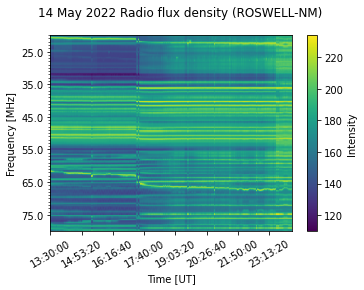

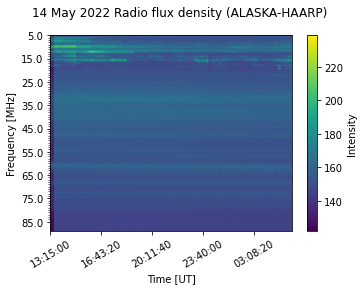

ALASKA-HAARP_20220514_000000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_001500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_003000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_004500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_010000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_011500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_013000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_014500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_020000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_021500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_023000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_024500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_030000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_031500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_033000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_034500_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_040000_62.fit.gz  -  FRQ01085.CFG
ALASKA-HAARP_20220514_041500_62.fit.gz  -  FRQ01

In [31]:
year = 2022
month = 5
day = 14

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month, day + 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month,day + 1, obs1, [45,81])
d22 = data.createDay(year,month,day + 1, obs2, [45,81])

ref1 = frqProfile(d11)
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = frqProfile(d21)
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

for i in d21:
    print(i," - ", i.spectrum_data.header["FRQFILE"])
for i in d22:
    print(i," - ", i.spectrum_data.header["FRQFILE"])

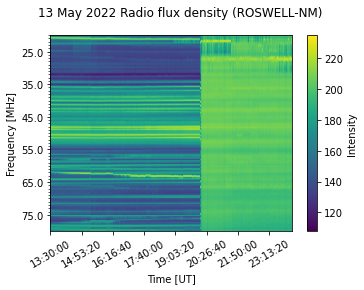

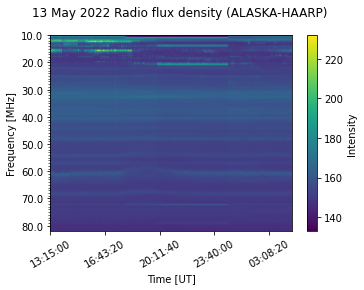

In [80]:
year = 2022
month = 5
day = 13

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month, day + 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month,day + 1, obs1, [45,81])
d22 = data.createDay(year,month,day + 1, obs2, [45,81])

ref1 = d11[-1].spectrum_data.header["FRQFILE"]
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = d21[-1].spectrum_data.header["FRQFILE"]
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

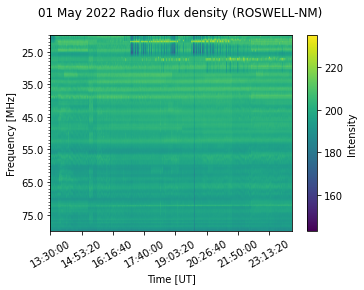

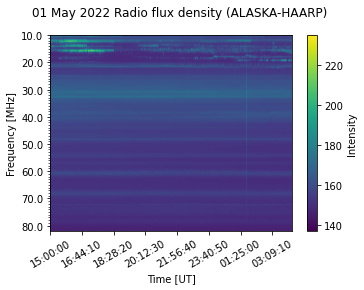

In [68]:
year = 2022
month = 5
day = 1

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month, day + 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month,day + 1, obs1, [45,81])
d22 = data.createDay(year,month,day + 1, obs2, [45,81])

ref1 = d11[0].spectrum_data.header["FRQFILE"]
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = d21[0].spectrum_data.header["FRQFILE"]
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

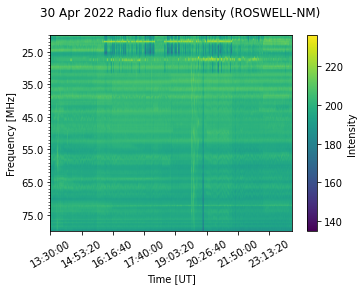

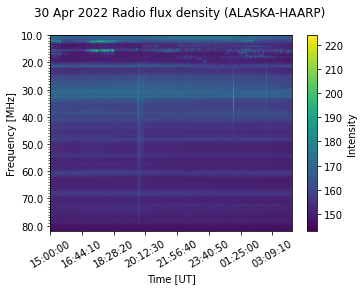

In [70]:
year = 2022
month = 4
day = 30

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month + 1, 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month + 1, 1, obs1, [45,81])
d22 = data.createDay(year,month + 1, 1, obs2, [45,81])

ref1 = d11[0].spectrum_data.header["FRQFILE"]
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = d21[0].spectrum_data.header["FRQFILE"]
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

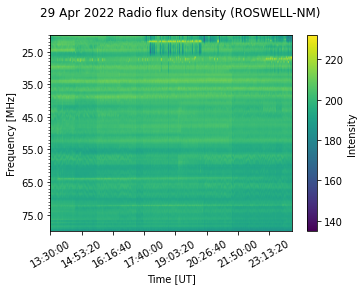

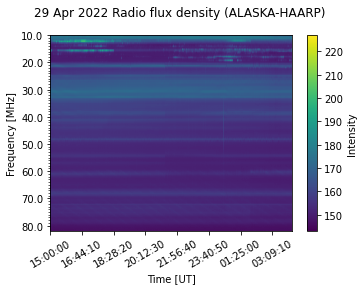

In [72]:
year = 2022
month = 4
day = 29

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month, day + 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month,day + 1, obs1, [45,81])
d22 = data.createDay(year,month,day + 1, obs2, [45,81])

ref1 = d11[0].spectrum_data.header["FRQFILE"]
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = d21[0].spectrum_data.header["FRQFILE"]
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

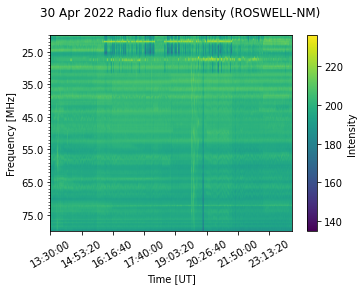

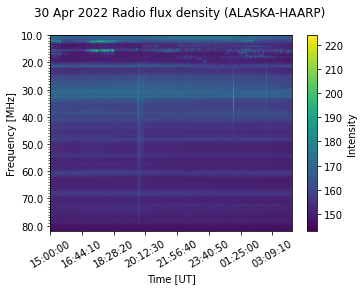

In [4]:
year = 2022
month = 4
day = 30

obs1 = observatories.roswell
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month + 1, 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month + 1, 1, obs1, [45,81])
d22 = data.createDay(year,month + 1, 1, obs2, [45,81])

ref1 = frqProfile(d11)
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = frqProfile(d21)
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

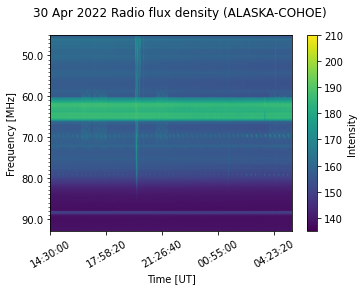

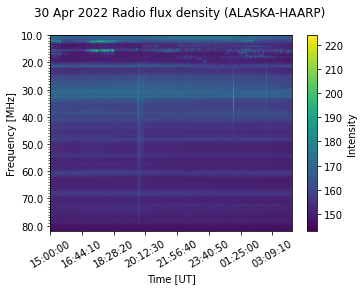

In [5]:
year = 2022
month = 4
day = 30

obs1 = observatories.alaska_cohoe
obs2 = observatories.alaska_haarp

download.downloadFullDay(year, month, day    , [obs1, obs2])
download.downloadFullDay(year, month + 1, 1, [obs1, obs2])

d11 = data.createDay(year,month,day, obs1, [45,81])
d21 = data.createDay(year,month,day, obs2, [45,81])

d12 = data.createDay(year,month + 1, 1, obs1, [45,81])
d22 = data.createDay(year,month + 1, 1, obs2, [45,81])

ref1 = frqProfile(d11)
g1 = [d11[i] for i in range(len(d11)) if (d11[i].hour > 8 and d11[i].spectrum_data.header["FRQFILE"] == ref1)]
g2 = [d12[i] for i in range(len(d12)) if (d12[i].hour < 8 and d12[i].spectrum_data.header["FRQFILE"] == ref1)]

g = sum(g1+g2)

ref2 = frqProfile(d21)
h1 = [d21[i] for i in range(len(d21)) if (d21[i].hour > 8 and d21[i].spectrum_data.header["FRQFILE"] == ref2)]
h2 = [d22[i] for i in range(len(d22)) if (d22[i].hour < 8 and d22[i].spectrum_data.header["FRQFILE"] == ref2)]

h = sum(h1+h2)

g.plot()
h.plot()

In [26]:
year = 2022
month = 5
day = 1
def reference(year, month, day):
    file = "./eCallistoData/reference/{}_events/{}{}{}events.txt".format(str(year), str(year), str(month).zfill(2), str(day).zfill(2))
    f = open(file)
    lines = f.readlines()
    f.close()
    lines = lines[12:]
    lines
    for line in lines:
        if line=='\n':
            lines.remove(line)

    for line in range(len(lines)):
        lines[line] = lines[line].rsplit(' ')
        lines[line] = list(filter(None, lines[line]))
        try:
            lines[line].remove('+')
        except ValueError:
            pass

    lines = list(filter(lambda line: line[6] == 'RSP', lines))

    print(day,'.', month, '.', year)
    for line in lines:
        print("{:5s}: {:} - {:}".format(line[8].rsplit('/')[0],line[1], line[3]))

reference(year, month, day)

1 . 5 . 2022
III  : 0003 - 0014
VI   : 0012 - 0152
III  : 0102 - 0104
III  : 0133 - 0134
III  : 0247 - 0251
III  : 0336 - 0337
III  : 0428 - 0430
V    : 0428 - 0440
III  : 0522 - 0522
III  : 0555 - 0555
III  : 0612 - 0616
VI   : 0719 - 0933
V    : 0814 - 0830
III  : 0814 - 0823
III  : 1155 - 1200
VI   : 1314 - 1420
VI   : 1316 - 1420
III  : 1519 - 1520
III  : 1542 - 1544
III  : 1644 - 1652
VI   : 1726 - 1823
III  : 1830 - 1831
III  : 2127 - 2127
III  : 2212 - 2212
